# Data Sources for Equities and Factors

## Agenda



1. **Data Sources (US and International Equities, ETFs, Commodity Futures)**

Remember that in addition to large-cap equities (eg, AMZN, GOOG) there are interesting industries (eg, Healthcare, Biotech) and other asset classes. You are more likely to find a sensible prediction scheme for commodity futures rather than a popular large cap.



2. **Fixing Yahoo!Finance access**

Yahoo!Finance was the easy choice for decates but began to limit the queries that are not coming from its website. You need a special session cookie. (NB You don't have to use Yahoo!Finance if you have more professional sources of equities/prices data).

_pandas_datareader_ and its versions. Packages installation in Python.



3. **Fama-French Factors data retrieval and essential interpretation**

In portfolio management 'Factor' is always a time series of returns from the special, long/short portfolio. Asset pricing research and practice rely on commonly agreed factors (5_Factors_2x3).

Because factor is a column of returns, we can regress on it to compute Factor Beta (exposure).

If you standardise a column of returns (that represent a Factor) and choose 99th percentile as your confidence, then the column of historical returns collapses into one Factor Value Z in $Z\times \sigma = 2.33\sigma$



4. **Quick regression on market vs. factors**

*sklearn* regression coeffients are found by optimisation.

*statsmodels.api* provides the regression output and computes using the extact analytical formulae



5. **(Statistical Plotting with Pandas: 3D Scatter, Lag Plots, Autocorrelation, Bootstrap Plot)**

This extra material is moving to separate content. Section given as is, without further development.

In [66]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt


# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Part 1. Data Sources: Equities, Indicies, ETFs, Commodity Futures

Depending on the version, [pandas-datareader](http://pandas-datareader.readthedocs.io/en/latest/remote_data.html) offered the following data sources:



- **Yahoo!Finance**. The functionality comes and gos but its is very important. Fixes (additional packages) might be required.


- **IEX API** is a semi-professional solution for Nasdaq/NYSE/AMEX tickers, within 5-year historic period. It supports websockets (to push data to you). Inlcuded since pandas_datareader 0.8.0 and requires an [API key](https://iextrading.com/developer/docs/#getting-started).

- **Alpha Vantage** is part of pandas_datareader as of 2023-May. Historically, we used a dedicated package, [more](https://github.com/RomelTorres/alpha_vantage).
    pip install alpha_vantage


- **Quandl** has some free datasets, but reqistration for your own API key required.


- **Tiingo** provides historical end-of-day data for a large set of equities, ETFs and mutual funds. Free registration required for get an API key.

Those sources support different kinds of data, not always interoperable with one another particularly when it comes to the indexing. However, you should be able to handle the common datetime stamp index and conversion between time zones.



## Deprecated

- Near real-time quotes were available from **Robinhood** but only up to 1-year period. Deprecated functionality. Downgrade to older version might not work due to change in Robinhood API.

- **Google Finance** was present in pandas-datareader v0.5.0, but deprecated since. Some indexes are **Stooq**.

- **Quantopian** offered a strategy-testing platform -- there was need not need to download data for market index and factors (to compute the rolling beta against).

Equities/instruments data for the strategy testing has to be (a) cleane and (b) available for the longer periods. The main limitation, however, was the dynamic nature of Quantopian backtesting: you needed to set up calendar rules and strategy rules (allocation, trading) using Python-like coding language, which was derived from the package *zipline*.

---

## Aside: Debugging in Python

```python
conda install -c anaconda pandas-datareader #Preferred way for anaconda (neater)

pip install pandas-datareader  #Simple way

pip install git+https://github.com/pydata/pandas-datareader  #To install the newest dev version from Github
```


**Python is an evolvling ecosystem**. Sometimes, updates to the 'core packages' (eg, pandas) create problems for the off-spring packages (eg, *pandas-datareader*) and vice versa.

Please do not give up and check if a problem can be easily fixed because it relates to naming/changed headings. Be prepared to work out simple solutions yourself or look for workarounds online. Eg, Stackoverflow might have the answer.



Below is an example when development version (usually the newest) *pandas-datareader 0.6.0+30.g3c17058 *pulled from Github did not work with the updated pandas. The solution was as follows:

Locate *fred.py* file inside /anaconda3/lib/python3.6/site-packages/pandas_datareader and replace the import call inside file.

```python
from pandas.core.common import is_list_like #REMOVE OR COMMENT OUT

from pandas.api.types import is_list_like #INSERT
NOTE When debugging in Python, read the final error message.
```

[1](https://github.com/pydata/pandas-datareader/pull/520), [2](https://stackoverflow.com/questions/50394873/import-pandas-datareader-gives-importerror-cannot-import-name-is-list-like)

---

## 
Yahoo!Finance: Issue and Solution

For a long time, common sources for the time series data (historic prices) were Yahoo!Finance and Google Finance. [A history](https://github.com/rsvp/fecon235/issues/7) of disruption with Yahoo!Finance API began in 2017.

There were reports Yahoo! IP-blocks if a connection makes too many requests in rapid succession, but most likely the connection is rejected for all but web display purposes. Python script yqd listed below explains the authentication issue and retrieves the right cookie.

If we try the link quiery1.finance.yahoo.com without yfinance fix, we will get a message alongside the following:

    "code": "Unauthorized",
    "description": "Invalid cookie"
    
[yfinance](https://github.com/ranaroussi/fix-yahoo-finance) The package (2019 update) offers one-stop solution to downloading equities data. This is your first point of call in travails with Yahoo!Finance. It also shows an interesting overrride -- if you have extisting code that relies on pandas-datareader syntax:

    `pip install yfinance --upgrade --no-cache-dir`
    
[Yahoo-finance](https://github.com/lukaszbanasiak/yahoo-finance) There is an older package yahoo-finance which explains the fields of data that were possible to pull from Yahoo!Finance.



**IF YAHOO!FINANCE FIX DOES NOT WORK (MIGHT HAPPEN ANY TIME) -- USE ALTERNATIVE SOURCES SUCH AS QUANDL, IEX API**

If you have own datasources, from work or other subscription it might be easier to use those.

In [2]:
import yfinance as yf

In [7]:
prices1 = yf.download("^GSPC ^VIX ^FTSE", start="2010-10-01", end="2017-09-30")

prices1.to_excel('results/20240607_Tut_EquitiesDataIndicies_x3.xlsx') # SAVE DATA INTO LOCAL FILES

[*********************100%%**********************]  3 of 3 completed


In [8]:
prices1.head(10)

Price         Adj Close                                Close               \
Ticker            ^FTSE        ^GSPC       ^VIX        ^FTSE        ^GSPC   
Date                                                                        
2010-10-01  5592.899902  1146.239990  22.500000  5592.899902  1146.239990   
2010-10-04  5556.000000  1137.030029  23.530001  5556.000000  1137.030029   
2010-10-05  5635.799805  1160.750000  21.760000  5635.799805  1160.750000   
2010-10-06  5681.399902  1159.969971  21.490000  5681.399902  1159.969971   
2010-10-07  5662.100098  1158.060059  21.559999  5662.100098  1158.060059   
2010-10-08  5657.600098  1165.150024  20.709999  5657.600098  1165.150024   
2010-10-11  5672.399902  1165.319946  18.959999  5672.399902  1165.319946   
2010-10-12  5661.600098  1169.770020  18.930000  5661.600098  1169.770020   
2010-10-13  5747.399902  1178.099976  19.070000  5747.399902  1178.099976   
2010-10-14  5727.200195  1173.810059  19.879999  5727.200195  1173.810059   

Price                         High                                  Low  \
Ticker           ^VIX        ^FTSE        ^GSPC       ^VIX        ^FTSE   
Date                                                                      
2010-10-01  22.500000  5615.100098  1150.300049  23.670000  5547.600098   
2010-10-04  23.530001  5601.200195  1148.160034  24.340000  5550.799805   
2010-10-05  21.760000  5646.100098  1162.760010  23.080000  5550.600098   
2010-10-06  21.490000  5695.500000  1162.329956  22.129999  5635.799805   
2010-10-07  21.559999  5707.299805  1163.869995  22.160000  5650.799805   
2010-10-08  20.709999  5663.700195  1167.729980  21.639999  5606.600098   
2010-10-11  18.959999  5686.000000  1168.680054  19.510000  5655.700195   
2010-10-12  18.930000  5677.000000  1172.579956  20.100000  5597.500000   
2010-10-13  19.070000  5760.500000  1184.380005  19.160000  5661.600098   
2010-10-14  19.879999  5770.899902  1178.890015  21.020000  5712.899902   

Price                                      Open                          \
Ticker            ^GSPC       ^VIX        ^FTSE        ^GSPC       ^VIX   
Date                                                                      
2010-10-01  1139.420044  22.459999  5548.600098  1143.489990  22.900000   
2010-10-04  1131.869995  23.299999  5592.899902  1144.959961  23.629999   
2010-10-05  1140.680054  21.709999  5556.000000  1140.680054  22.520000   
2010-10-06  1154.849976  21.459999  5635.799805  1159.810059  21.820000   
2010-10-07  1151.410034  21.280001  5681.399902  1161.569946  21.309999   
2010-10-08  1155.579956  20.290001  5662.100098  1158.359985  21.580000   
2010-10-11  1162.020020  18.799999  5657.600098  1165.319946  19.330000   
2010-10-12  1155.709961  18.549999  5672.399902  1164.280029  20.000000   
2010-10-13  1171.319946  17.900000  5661.600098  1171.319946  17.920000   
2010-10-14  1166.709961  19.400000  5747.399902  1177.819946  19.590000   

Price             Volume                     
Ticker             ^FTSE         ^GSPC ^VIX  
Date                                         
2010-10-01  8.236307e+08  4.298910e+09  0.0  
2010-10-04  6.042521e+08  3.604110e+09  0.0  
2010-10-05  8.300751e+08  4.068840e+09  0.0  
2010-10-06  7.566404e+08  4.073160e+09  0.0  
2010-10-07  9.472726e+08  3.910550e+09  0.0  
2010-10-08  1.047050e+09  3.871420e+09  0.0  
2010-10-11  4.756379e+08  2.505900e+09  0.0  
2010-10-12  6.373974e+08  4.076170e+09  0.0  
2010-10-13  9.713743e+08  4.969410e+09  0.0  
2010-10-14  1.129486e+09  4.969410e+09  0.0

In [9]:
# Extra download of GOOG prices -- for ML "market direction prediction"
prices2 = yf.download("GOOG", start="2010-10-01", end="2017-09-30")
prices2.to_excel('results/20240607_Tut_EquitiesDataGOOG.xlsx')

[*********************100%%**********************]  1 of 1 completed


## Pandas_Datareader (alternative)

This is a convenient library because it encompasses many data sources, not just Yahoo!Finance.

```python
conda uninstall pandas-datareader

conda install -c anaconda pandas-datareader==0.5.0
```

**WARNING WARNING** installing this older version of pandas-datareader package will trigger DOWNGRADE of other packages, particularly pandas in your working environment (most likely 'anaconda'). This older version of pandas likely TO CONFLICT with your curent/updated matplotlib -- and so simply conda install/uninstall matplotlib will not work. **SO** after you download the data you might want to REUPDATE pandas.

- Use [HOMEBREW](https://brew.sh/) to manage your packages and different working environments.

- [Python Environments](https://medium.freecodecamp.org/why-you-need-python-environments-and-how-to-manage-them-with-conda-85f155f4353c) simple management with conda and Anaconda installation also available.

**After you run yfinance, you can load price data as usual using 0.5.0 pandas-datareader.**

**Optionaly** you can override the pointer to pandas_datareader.

```python
from pandas_datareader import data as pdr

yf.pdr_override() # <== overrides the method from pandas-datareader OPTIONAL
data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30") # download dataframe
```

However, your older code based the datareader should run just as well. Below is code example,

```python
from pandas_datareader import data, wb

data.DataReader(ticker, data_source='yahoo', start=start, end=end)

# routine to be used in the loop -- to retrive several tickers' prices
def get_ticker(ticker, start, end):

    ticker = data.DataReader(ticker, data_source='yahoo', start=start, end=end)

    return ticker
```

In [10]:
from pandas_datareader import data as pdr

yf.pdr_override() # <== overrides the method from pandas-datareader OPTIONAL

df_temp = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30") # download dataframe

[*********************100%%**********************]  1 of 1 completed


In [11]:
df_temp.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,198.559998,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,199.741318,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,199.582657,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,200.296692,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,199.635498,46939700
2017-01-10,226.479996,227.449997,226.009995,226.460007,199.635498,63771900
2017-01-11,226.360001,227.100006,225.589996,227.100006,200.199722,74650000
2017-01-12,226.500000,226.750000,224.960007,226.529999,199.697220,72113200
2017-01-13,226.729996,227.399994,226.690002,227.050003,200.155640,62717900


**SUMMARY** 


1. AFTER you have run the lines below from yfinance -- cookies and authorisation for Yahoo!Finance will be working temporarily -- so you can run get_ticker() routine (and any existing code you might have) to obtain the data from pandas-datareader. Result!
2. RETRIEVE the data for each equity/index individually. Example below shows mismatch -- FTSE index value gets shifted down on every 5-7 day point. This is easy to spot when reviewing the full dataframe in Excel before proceeding to run statistical and machine learning analysis on it.
3. Good habit will be TO DOWNLOAD the data localy and next time read from the file. Use pandas.DataFrame.to_csv or to_excel methods to store the data.
4. Be mindful about timestamp/datestamp of your imported data and if Python import recognised any frequency to it. Common issues are: POSIX format vs. other formats, daily prices should have particular timestamp (UTC midnight).
---
## Aside: Scrapping

In the current environment, as data providers close up and other sources exercises limits on downloads, one might need to master a flexible web data scrapping tool.

[Scrapping Yahoo!Finance 2019](https://blog.datahut.co/scraping-yahoo-finance-using-python/) Examples at this link are excellent for scrapping 'today' data snapshots.

[Yahoo quote download](https://github.com/c0redumb/yahoo_quote_download/blob/master/yahoo_quote_download/yqd.py) reveal that Yahoo!Finance still retrieves the data for own pages via a query -- with a bit of authentication from a "crumb" of a cookie "B". Python script at this link retrieves the matching cookie and crumb. The following package can also be used to get prices data:

```python
import yqd
yf_data = yqd.load_yahoo_quote('AAPL', '20170722', '20170725')
```

[Financial statements data from Yahoo!Finance](https://www.mattbutton.com/2019/01/24/how-to-scrape-yahoo-finance-and-extract-fundamental-stock-market-data-using-python-lxml-and-pandas/) such as balance sheets and income statement can also be obtained and the link provides very goood way of doing it (code snippets).

[yahoofinancials](https://github.com/JECSand/yahoofinancials) a powerful script to get price and fundamentals data (version 01/27/2019) and save it in organised JSON format, written by someone for their semi-professional purpose.

---
## Retrieving SEVERAL Tickers

In [44]:
from pandas_datareader import data as pdr

def get_ticker(ticker, start, end):
    # Fetch the ticker data using the default data source (Yahoo Finance)
    ticker_data = pdr.DataReader(ticker, start, end)
    return ticker_data

# Futures Data: remember that ticker changes at Expiration/Rollover  https://finance.yahoo.com/commodities?ltr=1
#print(ticker[0]) for ticker in tickers
#for ticker in tickers: print(ticker[1])

In [48]:
tickers = [['^GSPC', 'SP500'], ['^VIX', 'VIX'], ['^FTSE', 'FTSE100']]

# Using dictionary comprehension to fetch data for each ticker
prices = pd.DataFrame({
    ticker[1]: get_ticker(ticker[0], start='2011-10-01', end='2019-09-30')['Adj Close']
    for ticker in tickers
}).dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [49]:
prices.head(10)

,SP500,VIX,FTSE100
Date,,,
2011-10-03,1099.229980,45.450001,5075.500000
2011-10-04,1123.949951,40.820000,4944.399902
2011-10-05,1144.030029,37.810001,5102.200195
2011-10-06,1164.969971,36.270000,5291.299805
2011-10-07,1155.459961,36.200001,5303.399902
2011-10-10,1194.890015,33.020000,5399.000000
2011-10-11,1195.540039,32.860001,5395.700195
2011-10-12,1207.250000,31.260000,5441.799805
2011-10-13,1203.660034,30.700001,5403.399902


In [50]:
prices.index

DatetimeIndex(['2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14',
               ...
               '2019-09-16', '2019-09-17', '2019-09-18', '2019-09-19',
               '2019-09-20', '2019-09-23', '2019-09-24', '2019-09-25',
               '2019-09-26', '2019-09-27'],
              dtype='datetime64[ns]', name='Date', length=1976, freq=None)

In [51]:
start = prices.index.min()
end = prices.index.max()
monthly_dates = pd.date_range(start, end, freq='M') #Create a new index of monthly frequency

monthly = prices.reindex(monthly_dates, method='ffill') #Re-indexing


returns = 100 * monthly.pct_change().dropna() 
#This can be adjusted into excess returns by subtracting risk-free rate from Fama-French data (monthly)
returns.head()

,SP500,VIX,FTSE100
2011-11-30,-0.505872,-7.209613,-0.699836
2011-12-31,0.853276,-15.827337,1.215169
2012-01-31,4.358306,-16.923073,1.961493
2012-02-29,4.058946,-5.195474,3.342367
2012-03-31,3.133231,-15.897994,-1.754237


In [58]:
tickers = [['AAPL', 'AAPL']]

prices3 = pd.DataFrame({
    ticker[1]: get_ticker(ticker[0], start='2011-10-01', end='2019-09-30')['Adj Close']
    for ticker in tickers
}).dropna()

prices3.to_excel('results/20240607_Tut_EquitiesDataAPPL.xlsx') #prices.DataFrame.to_csv  TO SAVE INTO FILE

[*********************100%%**********************]  1 of 1 completed


In [59]:
prices3.head(10)

,AAPL
Date,
2011-10-03,11.310946
2011-10-04,11.247540
2011-10-05,11.421161
2011-10-06,11.394591
2011-10-07,11.166017
2011-10-10,11.740016
2011-10-11,12.086653
2011-10-12,12.144023
2011-10-13,12.332438


In [60]:
prices3.pct_change().head(10)

,AAPL
Date,
2011-10-03,NaN
2011-10-04,-0.005606
2011-10-05,0.015436
2011-10-06,-0.002326
2011-10-07,-0.020060
2011-10-10,0.051406
2011-10-11,0.029526
2011-10-12,0.004747
2011-10-13,0.015515


# Part 2. Fama-French Factors Data Retrieval



**1. FACTOR IS A TIME SERIES OF RETURNS**



**2. RETURNS ARE FROM THE SPECIFIC LONG/SHORT STRATEGY**


"*famafrench*" dataset has 262 sets of numerious portfolio combinations, from factor portfolios to regional variations (North America/Europe/Japan/Asia Pacific. The main dataset names to backtest against (rolling beta calculation) are as follows:

- 'F-F_Research_Data_Factors' -- monthly data is **the default choice** for the Fama-French dataset
- 'F-F_Research_Data_Factors_weekly'
- 'F-F_Research_Data_Factors_daily'

## Three Factors (Classic Model)

1) **Mkt-RF** are the market index (S&P500) excess returns.

2) **HML (VALUE FACTOR)** is the difference between the returns on diversified portfolios of high and low $B/M$ ratio stocks -- the lower value of M itself means higher Book-to-Market ratio and therefore, higher expectation of future return.

3) **SMB** is the difference between returns on diversified portfolios of small-sized equities minus big-sized (large cap) equties.

## Five Factors (Updated Model)

- 'F-F_Research_Data_5_Factors_2x3',
- 'F-F_Research_Data_5_Factors_2x3_daily'

4) **RMW** is the difference between the returns on diversified portfolios of equities with Robust vs. Weak profitability

5) **CMA** is the difference between returns on diversified portfolios of low-investment equities (Conservative) minus high-investment equities (Aggressive).

The range of portfolios, for which factors are backtested, is better explained at source [http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)

## Momentum Factor

There is no formal factor to reflect momentum phenomenon in the research framework and its backtesting. That was a major drawback (rendering Fama-French factors less useable for risk management), and since that UMD factor was developed and can be downloaded directly from [http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Momentum_Factor_daily_CSV.zip](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Momentum_Factor_daily_CSV.zip)

References:

*A Five-Factor Asset Pricing Model Fama & French (2014)*

*Quantopian Risk Model Whitepaper (2018)*

https://www.quantopian.com/posts/risk-model-white-paper-released-and-available-for-your-reading

In [69]:
import pandas_datareader as pdr

from pandas_datareader.famafrench import get_available_datasets

In [70]:
FFDataTest = pdr.get_data_famafrench('F-F_Research_Data_5_Factors_2x3_daily', start=2010)[0]

In [71]:
FFDataTest.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01-04,1.69,0.79,1.13,-0.17,0.21,0.0
2010-01-05,0.31,-0.41,1.24,-0.19,0.19,0.0
2010-01-06,0.13,-0.13,0.57,-0.05,0.20,0.0
2010-01-07,0.40,0.25,0.98,-0.69,0.22,0.0
2010-01-08,0.33,0.32,0.01,0.22,-0.37,0.0


## Industry Portfolios

These are not factors because they are not constructed as long/short strategies.

# PART 3 Markets and Factors

Back to exploration of relationship between the market (indicies) and the factors.

In [72]:
#One more example ['Mkt-RF', 'SMB', 'HML', 'RF']
FFdata_Classic =  pdr.get_data_famafrench('F-F_Research_Data_5_Factors_2x3_daily',start = 2010)[0] 
FFdata_Classic.head()

#ff.columns = ['Mkt_rf', 'SMB', 'HML', 'rf']    
#ff.index = [dt.datetime(d/100, d%100, 1) for d in ff.index] #issue running this code

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01-04,1.69,0.79,1.13,-0.17,0.21,0.0
2010-01-05,0.31,-0.41,1.24,-0.19,0.19,0.0
2010-01-06,0.13,-0.13,0.57,-0.05,0.20,0.0
2010-01-07,0.40,0.25,0.98,-0.69,0.22,0.0
2010-01-08,0.33,0.32,0.01,0.22,-0.37,0.0


In [73]:
# here was a code to append the data to factors data (into one dataframe)

### ASIDE: Dataframe Index

Code below explores the type of index for our downloaded datasets. We need to ensure the index is compatible before merging two dataframes -- usually for a purpose of running a regression.

It makes sense to keep track of relationship and factor beta on monthly rather than daily basis.

pd.concat merges two dataframes, granted they have the same index. Otherwise it appends the second dataframe TO THE BOTTOM -- not the outcome we look for.

freq attribute None, because the index is UTC date+time stamp rather than day of month.

to_period('M') explained in https://stackoverflow.com/questions/23840797/convert-a-column-of-timestamps-into-periods-in-pandas

to_timestamp explained in https://stackoverflow.com/questions/29394730/converting-periodindex-to-datetimeindex

In [74]:
returns.head(10)

,SP500,VIX,FTSE100
2011-11-30,-0.505872,-7.209613,-0.699836
2011-12-31,0.853276,-15.827337,1.215169
2012-01-31,4.358306,-16.923073,1.961493
2012-02-29,4.058946,-5.195474,3.342367
2012-03-31,3.133231,-15.897994,-1.754237
2012-04-30,-0.749745,10.645159,-0.532204
2012-05-31,-6.265073,40.291545,-7.265850
2012-06-30,3.955498,-29.010805,4.704097
2012-07-31,1.259757,10.831384,1.150553
2012-08-31,1.976337,-7.712631,1.352194


In [75]:
returns.index # DatetimeIndex(dtype='datetime64[ns]', freq='M') 

DatetimeIndex(['2011-11-30', '2011-12-31', '2012-01-31', '2012-02-29',
               '2012-03-31', '2012-04-30', '2012-05-31', '2012-06-30',
               '2012-07-31', '2012-08-31', '2012-09-30', '2012-10-31',
               '2012-11-30', '2012-12-31', '2013-01-31', '2013-02-28',
               '2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30',
               '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31',
               '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28',
               '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30',
               '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31',
               '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28',
               '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
      

In [76]:
FFdata_Classic.head(10)

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01-04,1.69,0.79,1.13,-0.17,0.21,0.0
2010-01-05,0.31,-0.41,1.24,-0.19,0.19,0.0
2010-01-06,0.13,-0.13,0.57,-0.05,0.20,0.0
2010-01-07,0.40,0.25,0.98,-0.69,0.22,0.0
2010-01-08,0.33,0.32,0.01,0.22,-0.37,0.0
2010-01-11,0.13,-0.13,-0.25,0.19,0.59,0.0
2010-01-12,-1.00,-0.36,-1.28,0.49,-0.04,0.0
2010-01-13,0.85,0.32,0.33,-0.36,0.08,0.0
2010-01-14,0.24,0.24,0.08,-0.29,-0.02,0.0


In [77]:
FFdata_Classic.index # PeriodIndex(dtype='period[M]', name='Date', freq='M')

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[ns]', name='Date', length=3605, freq=None)

`pd.concat()`

`FFdata_Classic.to_timestamp()`
will create index with FIRST DAY of the month. Notice that our returns dataframe has index as LAST DAY of month. Therefore, pd.concat() will not work after the line above. Instead we have to fix the index type for returns with `_toperiod('M')` first.

In [78]:
datamain = pd.concat([returns, FFdata_Classic], axis=1).dropna() 

datamain.head()

,SP500,VIX,FTSE100,Mkt-RF,SMB,HML,RMW,CMA,RF
2011-11-30,-0.505872,-7.209613,-0.699836,4.44,1.11,1.17,-1.20,-0.02,0.0
2012-01-31,4.358306,-16.923073,1.961493,-0.05,-0.04,0.01,-0.06,-0.14,0.0
2012-02-29,4.058946,-5.195474,3.342367,-0.55,-1.05,0.16,0.19,0.29,0.0
2012-04-30,-0.749745,10.645159,-0.532204,-0.49,-0.60,0.00,-0.03,-0.12,0.0
2012-05-31,-6.265073,40.291545,-7.265850,-0.23,0.20,0.53,-0.15,0.24,0.0


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

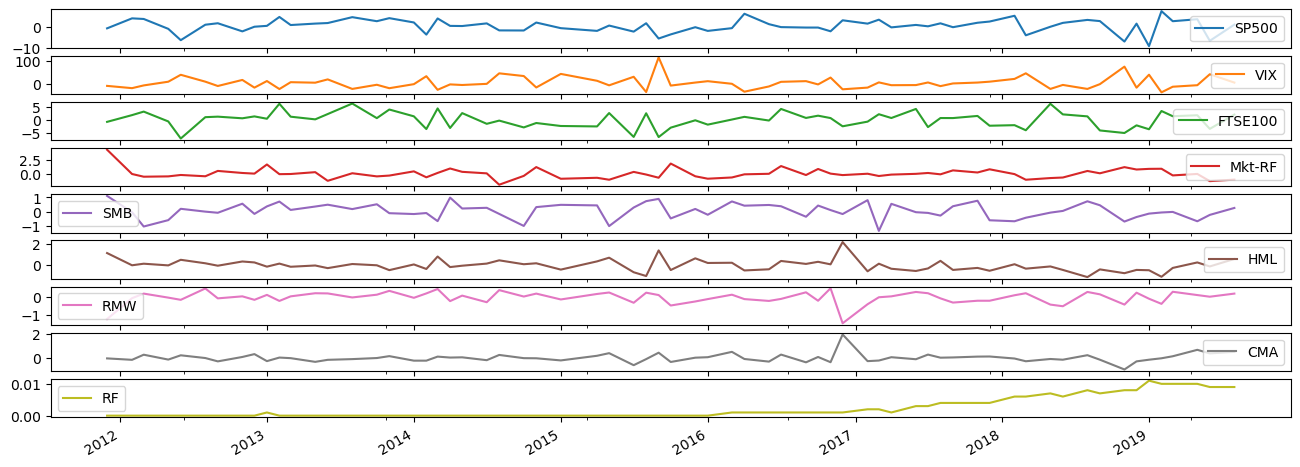

In [79]:
datamain.plot(figsize=(16,6), subplots=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

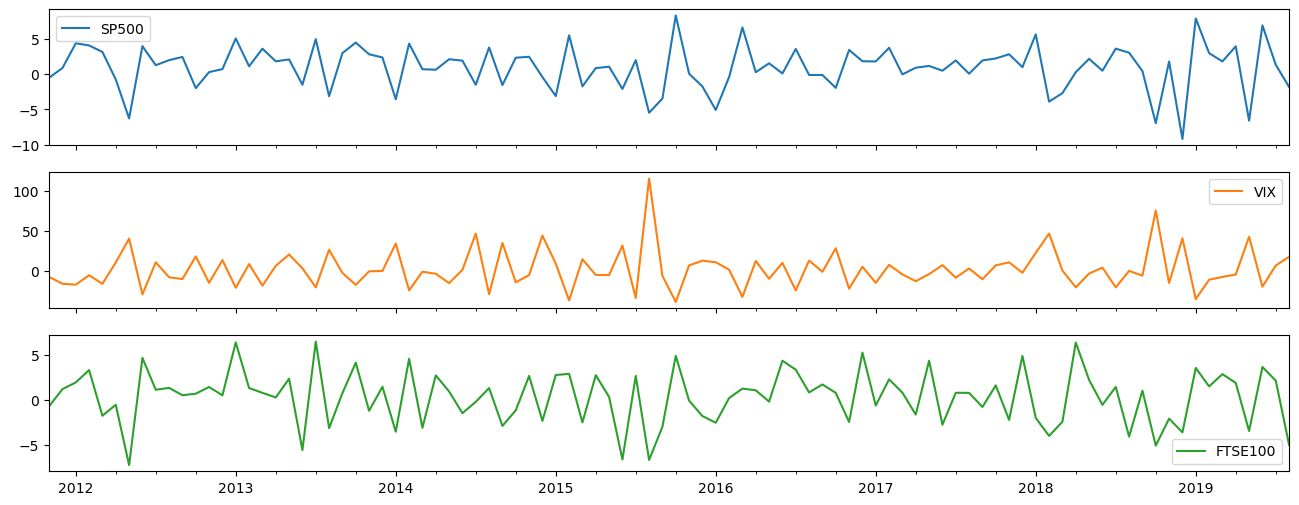

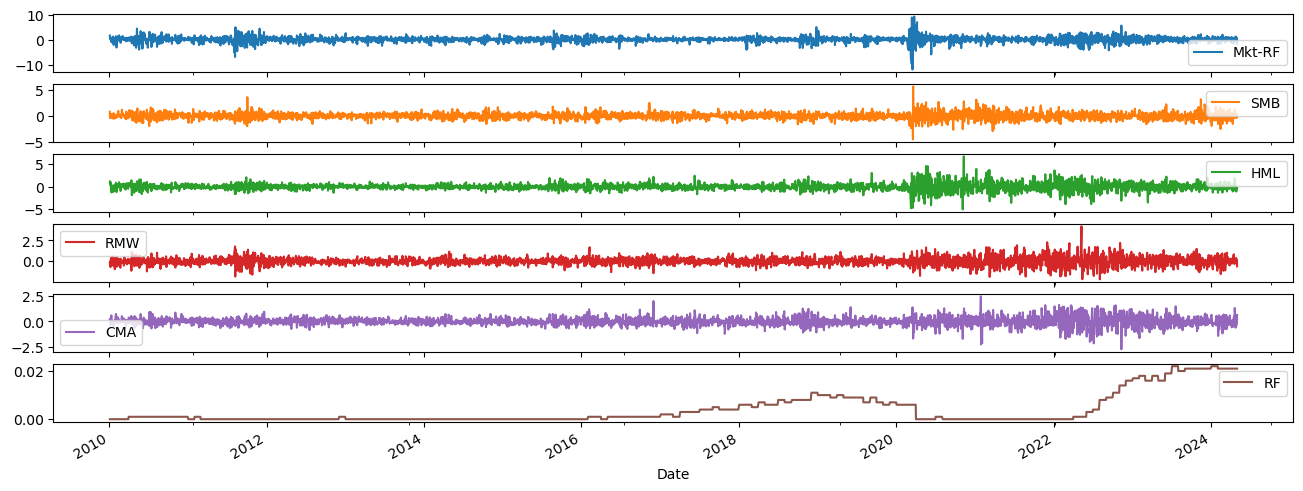

In [80]:
returns.plot(figsize=(16,6), subplots=True)  #'01-10-2011', '30-09-2019'
FFdata_Classic.plot(figsize=(16,6), subplots=True) # 01-01-2010

## Quick Regression for Factor Backtesting

There are two choices of packages to run statistical routines in Python (on top of numpy core package):

- *sklearn* linear model will be useful for our Machine Learning endeavours, particularly running of the classifiers.
Its LinearRegression implementation though done as a classifier and beta coefficients are found by optimisation, not by exact OLS formulae that stem from analytical optimisation (eg, derivatives equated to zero) of the joint Normal pdf of regression residuals.

- *statsmodels* is a routine choice for running statistics in Python, It is less friendly, and documentation is dry style. There are problems with its ts.coint() routine. statsmodels have no features to facilitate **Rolling Estimation** of betas or do crossvalidation-type estimation with various sample selection from the dataset. 


In [81]:
from sklearn import linear_model

In [82]:
Y_Strategy = datamain.loc[:,['SP500']]
X_Factors  = datamain.loc[:,['Mkt-RF', 'SMB', 'HML']] #df2.loc[startrow:endrow,startcolumn:endcolumn]

# Create linear regression object
OLS = linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
OLS.fit(X_Factors, Y_Strategy)

LinearRegression()

Below are our **Factor Betas** (theory explained in Project Workshop)

In [83]:
# Regression coefficients are our betas wrt factors
print('Coefficients: \n', OLS.coef_)

Coefficients: 
 [[ 0.09106938 -0.11085303 -0.42681979]]


In [84]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [85]:
X_Factors = sm.add_constant(X_Factors)

backtest_OLS = sm.OLS(Y_Strategy, X_Factors).fit()
print(backtest_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                    0.1291
Date:                Sun, 23 Jun 2024   Prob (F-statistic):              0.942
Time:                        00:39:29   Log-Likelihood:                -170.58
No. Observations:                  66   AIC:                             349.2
Df Residuals:                      62   BIC:                             357.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7366      0.410      1.797      0.0

## EXERCISE: Rolling Parameter Estimation

1) The proper backtesting would require estimation of betas wrt factors on the rolling basis, rather than producing one-off beta figures.

2) Altegratively, one can utilise train_test_split functionality and crossvalidate the betas.

**REMINDER** The advantage of integrated Quantopian backtesting is that you would not need to reinvent computation of rolling beta, SR (and the factor data is held by Quantopian library for you).

Limitations (1) you will be within Quantopian Risk Model as set in their whitepaper amd (2) the need to learn their package and `backtesting command language'.

Naturally, with the full-scale industry implementation you will have own data feeds and own systems. Quantopian library is a mid-way solution.



# Part 3. Pandas Plotting Capabilities

## 2D and 3D Scatterplots

Scatterplots between returns give idea of correlation. An attempt of 3D plot between factor time series gives spatial idea of the relationships between factors themselves. If only we could rotate!

**Explanation**: since our implied strategy was to invest 100% in S&P500 (from *Yahoo!Finance*) then its logical to observe neat correlation with the Market Factor which is S&P500 excess returns (from *Fama-French dataset*).

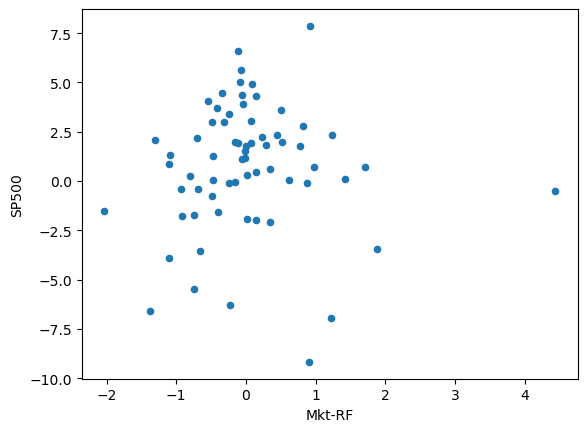

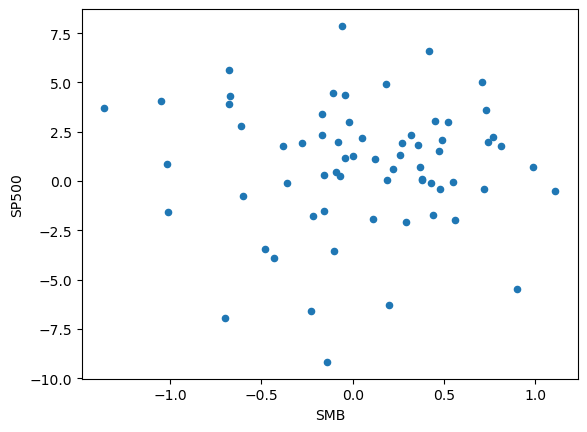

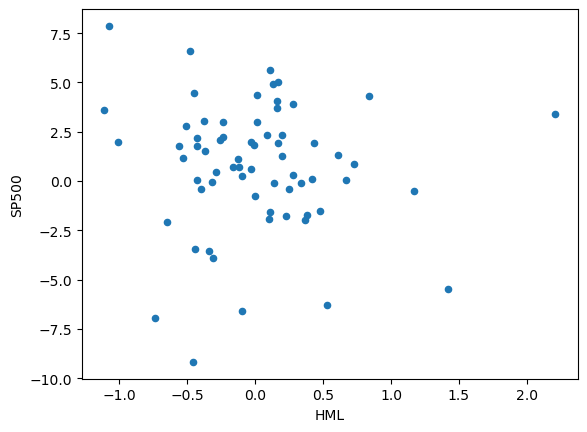

In [86]:
#Scatterplots directly from dataframe objects
#http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#scatter-plot 
datamain.plot(kind='scatter', x='Mkt-RF', y='SP500');

datamain.plot(kind='scatter', x='SMB', y='SP500');

datamain.plot(kind='scatter', x='HML', y='SP500');

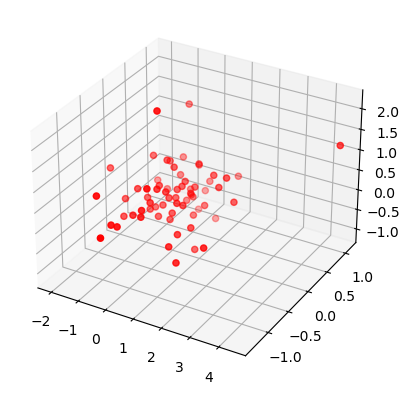

In [87]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

figure = plt.figure()
ax=figure.add_subplot(111, projection='3d')
ax.scatter(X_Factors['Mkt-RF'], X_Factors['SMB'], X_Factors['HML'], c='r', marker='o')
plt.show()

## Statistical Analysis via plots: Lag Plots, Autocorrelation, Bootstrap Plots

When plots are not simply plots but long-established tools of statical analysis. For instance, lag plots are simple idea of plotting return at time $t$ vs $t-1$, the more cirle-shaped the cloud is, the less autocorrelation and more 'Normality' there is to such data.

Pandas plotting offers interesting features that parallel Matlab,

- matrix of scatterplots (for correlation/copula exploration)
- Andrews curves
- lag plot to check for iid-ness
- autocorrelation plot
- bootstrap plots are used to visually assess the uncertainty of a statistic, such as mean

All you need to know about plotting with pandas is available at

**MORE EXAMPLES**: http://pandas.pydata.org/pandas-docs/version/0.21.0/visualization.html and it appears Pandas implements Graphical Techniques from Engineering Statistics Textbook published by NIST.

**CODING IN R**: in R with similar functionality from ggplot2 library. https://opendatascience.com/blog/data-visualization-part-2/

array([[<Axes: xlabel='SP500', ylabel='SP500'>,
        <Axes: xlabel='Mkt-RF', ylabel='SP500'>,
        <Axes: xlabel='SMB', ylabel='SP500'>,
        <Axes: xlabel='HML', ylabel='SP500'>],
       [<Axes: xlabel='SP500', ylabel='Mkt-RF'>,
        <Axes: xlabel='Mkt-RF', ylabel='Mkt-RF'>,
        <Axes: xlabel='SMB', ylabel='Mkt-RF'>,
        <Axes: xlabel='HML', ylabel='Mkt-RF'>],
       [<Axes: xlabel='SP500', ylabel='SMB'>,
        <Axes: xlabel='Mkt-RF', ylabel='SMB'>,
        <Axes: xlabel='SMB', ylabel='SMB'>,
        <Axes: xlabel='HML', ylabel='SMB'>],
       [<Axes: xlabel='SP500', ylabel='HML'>,
        <Axes: xlabel='Mkt-RF', ylabel='HML'>,
        <Axes: xlabel='SMB', ylabel='HML'>,
        <Axes: xlabel='HML', ylabel='HML'>]], dtype=object)

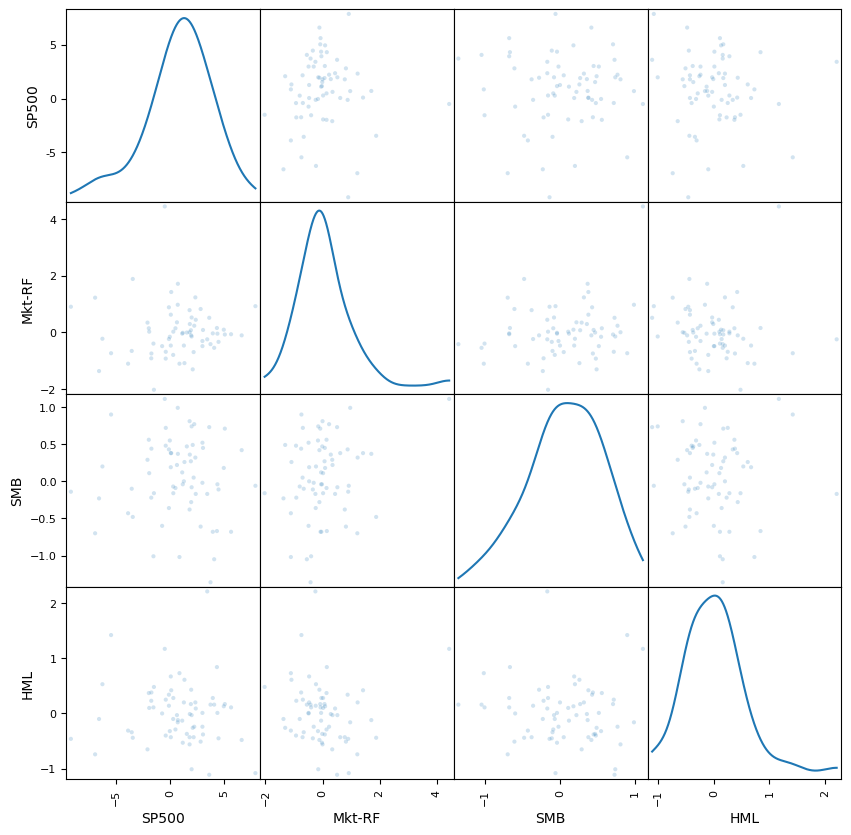

In [88]:
from pandas.plotting import scatter_matrix

scatter_matrix(datamain.loc[:,['SP500', 'Mkt-RF', 'SMB', 'HML']], alpha=0.2, figsize=(10, 10), diagonal='kde')

When interpreting autocorrelation, remember that we used MONTHLY returns to be compatible with Fama-French monthly frequency.

---

## Lag Plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

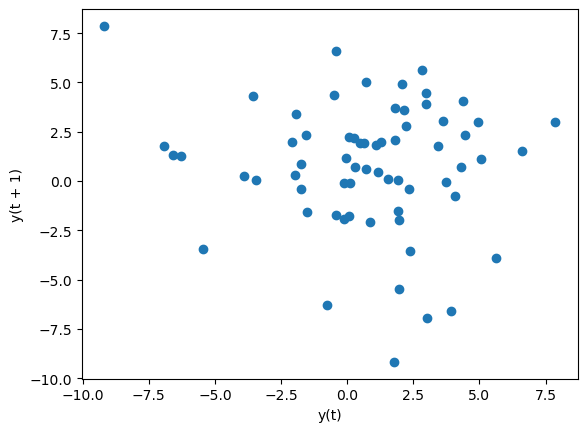

In [89]:
from pandas.plotting import lag_plot

lag_plot(datamain.loc[:,['SP500']])

## Autocorrelation Plot - ACF

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

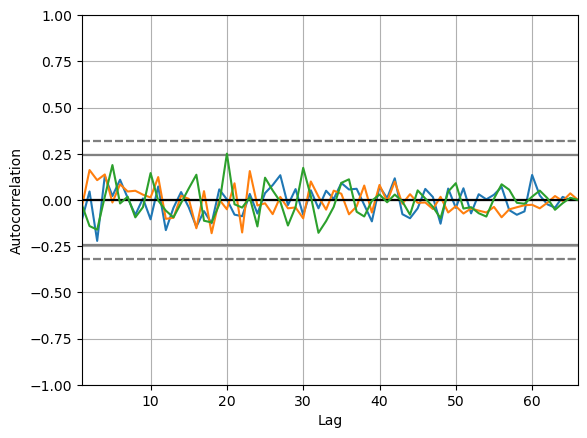

In [90]:
from pandas.plotting import autocorrelation_plot
from pandas.plotting import radviz

autocorrelation_plot(datamain.loc[:,['SP500']])
autocorrelation_plot(datamain.loc[:,['HML']])
autocorrelation_plot(datamain.loc[:,['SMB']])

<Axes: >

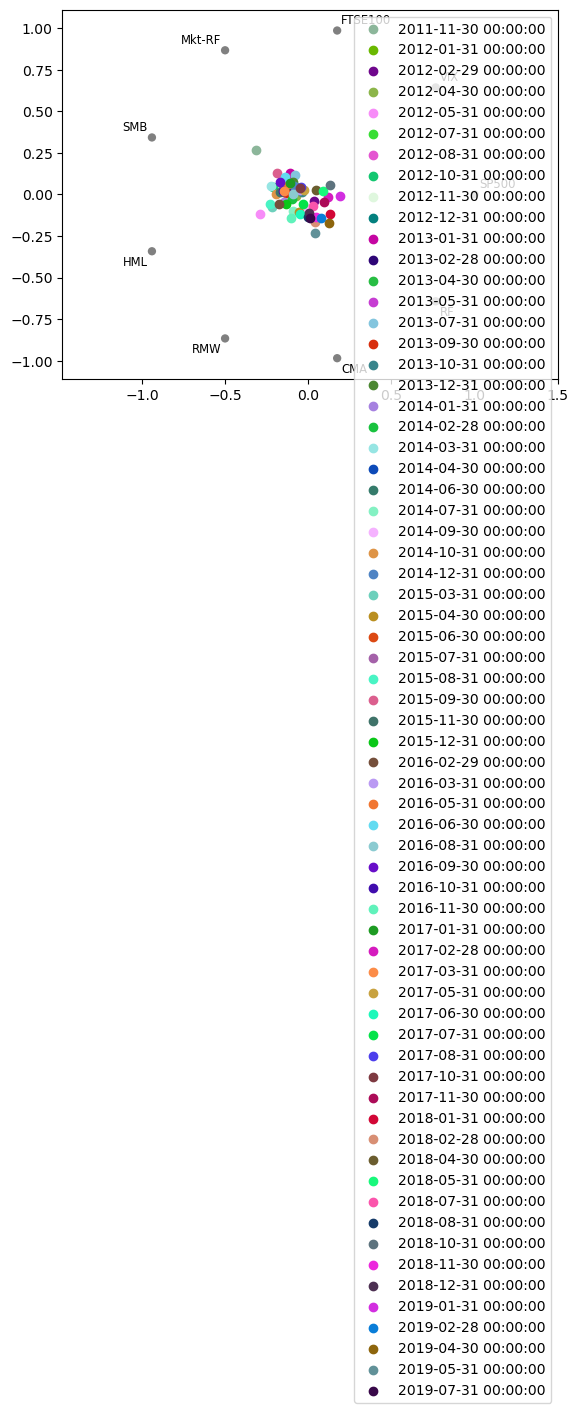

In [91]:
# Time series datasets -- indexed by dates, there are no name labels for observations, otherwise we can run radviz plot.
# One can group monthly returns, or returns clusters for increased vol periods.

from pandas.plotting import radviz

datamain.index.name = 'Date'

plt.figure()
radviz(datamain.reset_index(), 'Date')

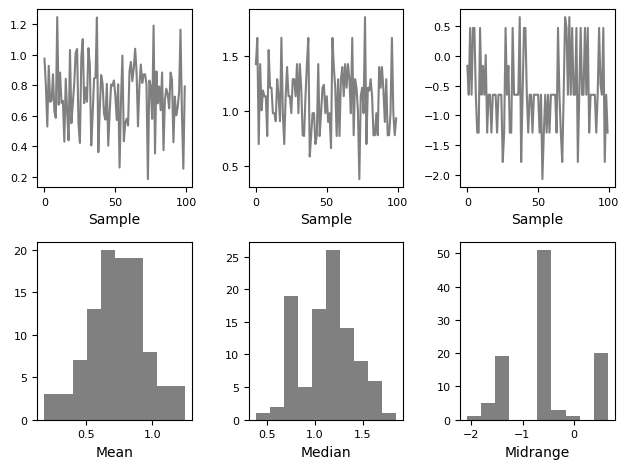

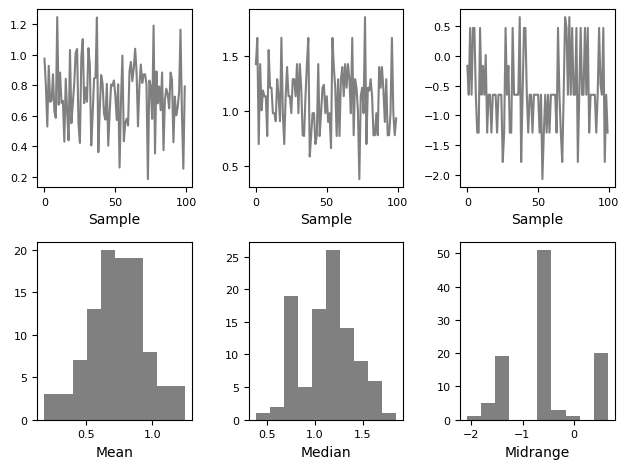

In [92]:
from pandas.plotting import bootstrap_plot

bootstrap_plot(datamain['SP500'], size=50, samples=100, color='grey')

Visually assess the uncertainty of a statistic, such as mean, median, midrange. A random subset of a specified size is selected, the statistic in question is computed -- the process is repeated a specified number of times samples=100. Resulting plots and histograms are what constitutes the **bootstrap plot**.